In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [62]:
data = pd.read_csv("SpotifyFeatures.csv")
df = pd.DataFrame(data)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [63]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [64]:
sort_popularity = df.sort_values('popularity',ascending=True, inplace= True)

In [65]:
most_popular = df.query('popularity>90').sort_values('popularity',ascending=False)
most_popular

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,Dance,Jonas Brothers,Sucker,4y3OI86AEP6PQoDE6olYhO,91,0.04360,0.846,181040,0.731,0.000000,C#,0.0949,-5.027,Minor,0.0640,137.947,4/4,0.933
9045,Dance,The Chainsmokers,Who Do You Love (with 5 Seconds of Summer),11cDEev79fPKi6uJCjUhu8,91,0.00791,0.510,226747,0.835,0.000000,D#,0.2190,-4.673,Major,0.0447,140.024,4/4,0.435
66750,Hip-Hop,Daddy Yankee,Adictiva,6MJUCumnQsQEKbCy28tbCP,91,0.29100,0.788,207853,0.771,0.000056,E,0.1720,-3.206,Minor,0.0563,99.038,4/4,0.701
86960,Rap,Juice WRLD,Robbery,44ShclXTOOnYtt5CnCDeGV,91,0.34200,0.708,240527,0.691,0.000000,D,0.2220,-5.179,Major,0.0442,79.990,4/4,0.535


In [66]:
df['duration'] = df['duration_ms'].apply(lambda x:(x/1000))
df['duration'].head(8)

86    259.000
82    292.720
81     69.355
80    211.133
79    199.587
78    978.303
77    180.133
76    118.600
Name: duration, dtype: float64

In [67]:
le = LabelEncoder()
he = OneHotEncoder(sparse_output=False)
df['mode'] = le.fit_transform(df['mode'])
df['genre'] = le.fit_transform(df[['genre']])
df['mode'].head(10)
df['genre'].head(10)


e:\data sets\spotify_dataanalytics\spotify\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86    15
82    15
81    15
80    15
79    15
78    15
77    15
76    15
75    15
74    15
Name: genre, dtype: int64

In [68]:
numerical_feature = df.select_dtypes(include=['int', 'float64'])
data_corr = numerical_feature.corr()

TypeError: unsupported format string passed to method.__format__

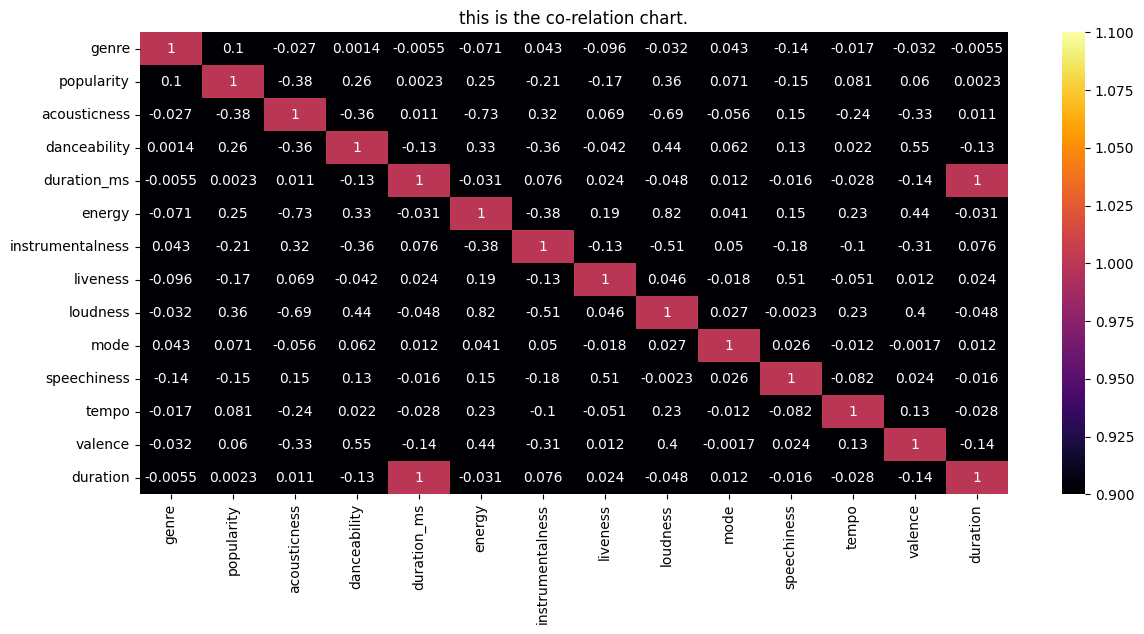

In [69]:
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(data_corr,vmin=1, vmax=1, annot=True, cmap='inferno')
heatmap.set_title("this is the co-relation chart.")
heatmap.set_xticklabels(heatmap.get_xticklabels, rotation=90)


In [70]:
#spliting the data for training and testing.
x = df['loudness']
y = df['energy']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
#let make a graph between loudness --> Enrgy to find out which regression model is best suit.
plt.scatter(X_train,y_train, )
plt.plot(x_train,y_predicted )
plt.show()

SyntaxError: invalid syntax (421416717.py, line 2)